# Simple Scatter Plots

In [3]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')
import numpy as np

C:\Users\Koushik Mahanta\AppData\Local\Temp\ipykernel_7012\3518078781.py:3: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-whitegrid')


## Scatter Plots with plt.plot

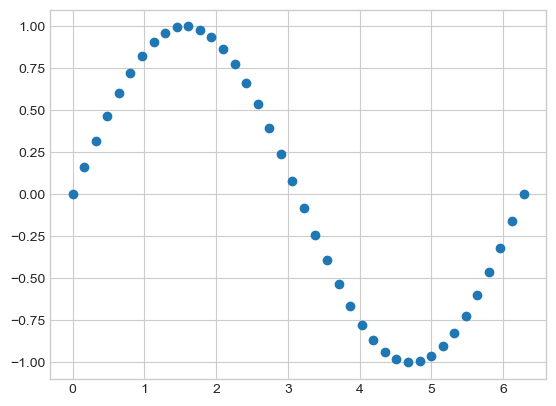

In [29]:
x = np.linspace(0, 2*np.pi, 40)
plt.plot(x, np.sin(x), 'o');

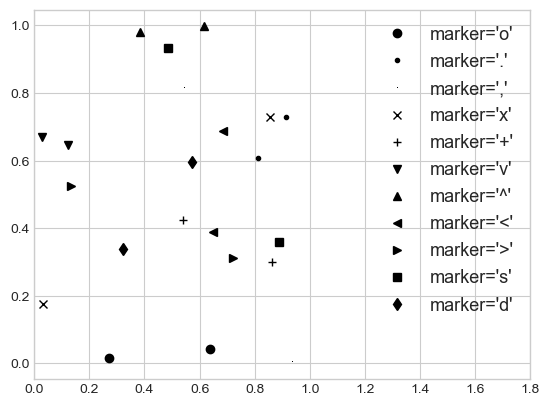

In [26]:
rng = np.random.default_rng(0)
for marker in ['o', '.', ',', 'x', '+', 'v', '^', '<', '>', 's', 'd']:
    plt.plot(rng.random(2), rng.random(2), marker, color='black',
    label="marker='{0}'".format(marker))
plt.legend(numpoints=1, fontsize=13)
plt.xlim(0, 1.8);

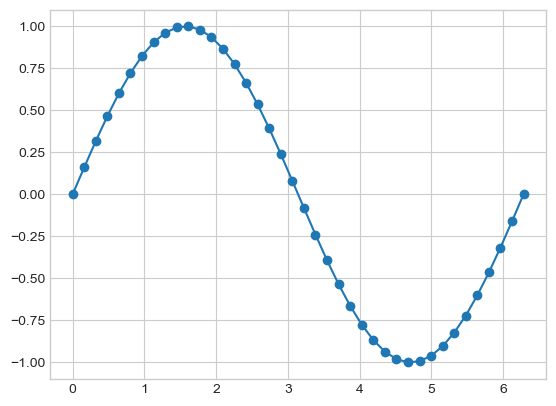

In [31]:
plt.plot(x, np.sin(x), '-o');

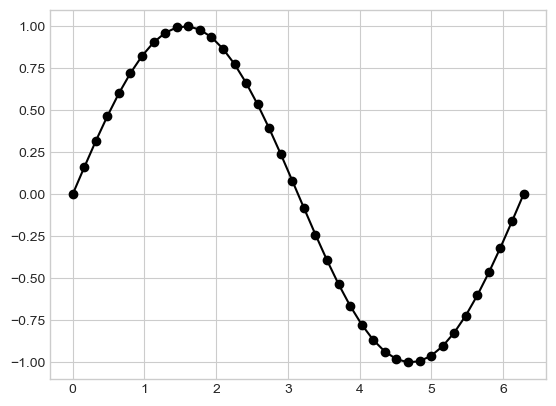

In [35]:
plt.plot(x, np.sin(x), '-ok');

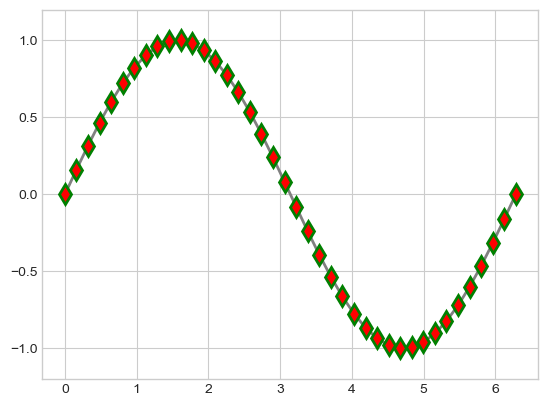

In [36]:
plt.plot(x, np.sin(x), '-d', color='gray',
                    markersize=10, linewidth=2,
                    markerfacecolor='red',
                    markeredgecolor='green',
                    markeredgewidth=2)
plt.ylim(-1.2, 1.2);

## Scatter Plots with plt.scatter

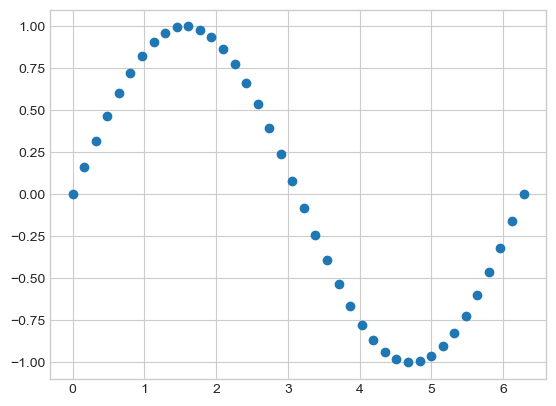

In [37]:
plt.scatter(x, np.sin(x), marker='o');

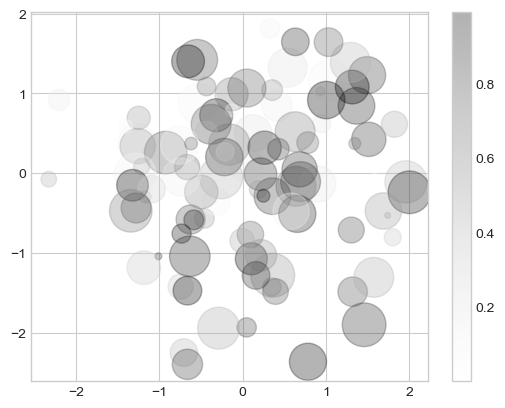

In [46]:
rng = np.random.default_rng(0)
x = rng.normal(size=100)
y = rng.normal(size=100)
colors = rng.random(100)
sizes = 1000 * rng.random(100)

plt.scatter(x, y, marker='o', c=colors, s=sizes, alpha=0.3)
plt.colorbar();

In [50]:
from sklearn.datasets import load_iris
iris = load_iris()
features = iris.data.T

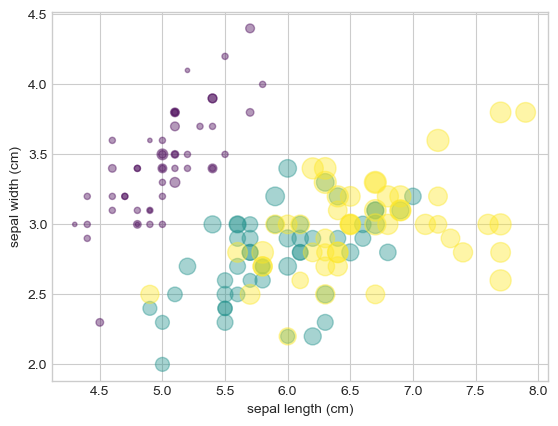

In [64]:
plt.scatter(features[0], features[1], alpha=0.4, s=100*features[3], c=iris.target, cmap='viridis')
plt.xlabel(iris.feature_names[0])
plt.ylabel(iris.feature_names[1]);

## plot Versus scatter: A Note on Efficiency

* ```plt.scatter``` has the capability to render a different size and/or color for each point, so the renderer must do the extra work of constructing each point individually.

* With ```plt.plot```, on the other hand, the markers for each point are guaranteed to be identical, so the work of determining the appearance of the points is done only once for the entire set of data.

* For large datasets, ```plt.plot``` should be preferred over ```plt.scatter``` for large datasets.

## Visualizing Uncertainties

### Basic Errorbars

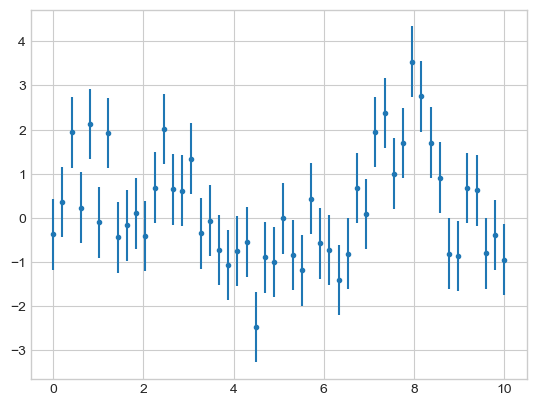

In [71]:
x = np.linspace(0, 10, 50)
dy = 0.8
y = np.sin(x) + dy * np.random.randn(50)
plt.errorbar(x, y, yerr=dy, fmt='.');

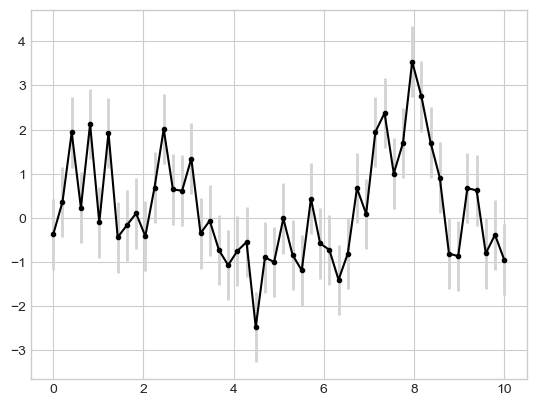

In [87]:
plt.errorbar(x, y, yerr=dy, fmt='.-', color='black', ecolor='lightgray', elinewidth=2, capsize=0);

### Continuous Errors

In [88]:
from sklearn.gaussian_process import GaussianProcessRegressor

In [89]:
# define the model and draw some data
model = lambda x: x * np.sin(x)
xdata = np.array([1, 3, 5, 6, 8])
ydata = model(xdata)

# Compute the Gaussian process fit
gp = GaussianProcessRegressor()
gp.fit(xdata[:, np.newaxis], ydata)

xfit = np.linspace(0, 10, 1000)
yfit, dyfit = gp.predict(xfit[:, np.newaxis], return_std=True)

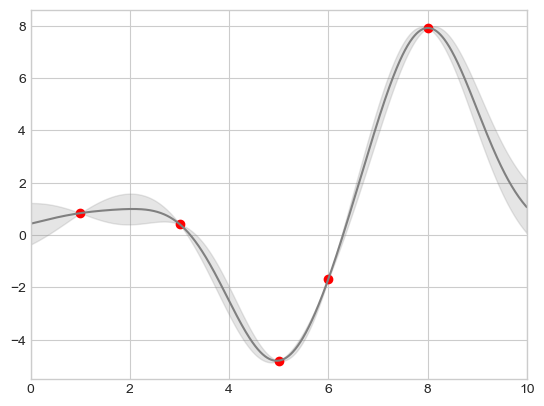

In [93]:
# Visualize the result
plt.plot(xdata, ydata, 'or')
plt.plot(xfit, yfit, '-', color='gray')
plt.fill_between(xfit, yfit - dyfit, yfit + dyfit,
color='gray', alpha=0.2)
plt.xlim(0, 10);